In [2]:
from qiskit.circuit import QuantumCircuit, Parameter
theta = Parameter('θ')

In [3]:
qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw()

┌───────┐         
q_0: ┤ Rz(θ) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ Rz(θ) ├
              └───────┘

In [6]:
# different paramters for the gates
from qiskit.circuit import ParameterVector
theta_list = ParameterVector('θ', length=2)

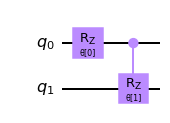

In [7]:
qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw('mpl')

In [8]:
# Expressibility

import numpy as np
import matplotlib.pyplot as plt

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Ф')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)

In [9]:
# We uniformly sample the parameter space for the 2 parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

In [10]:
# Then we take the parameter value lists, build the state vectors corresponding 
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    
    # Converts state vectors to points on the Bloch sphere
    
    phi = np.angle(state_vec.data[1]) - np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]

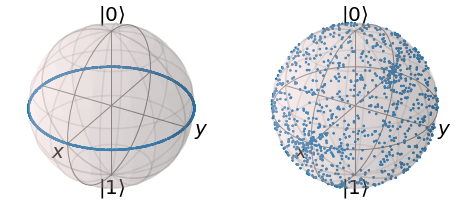

In [13]:
# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection = '3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1, b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'], ['tab:blue']
b1.point_marker, b2.point_marker=['o'], ['o']
b1.point_size, b2.point_size=[2], [2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):
    state_1 = Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2 = Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

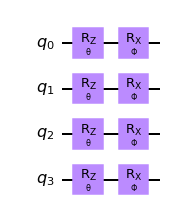

In [24]:
# Entangling capability

# We need to define the circuits:
thetaa_param = Parameter('θ')
phii_param = Parameter('Φ')

# Circuite A, with 4 qubits, has no entanglet states
qc_C = QuantumCircuit(4)
qc_C.rz(thetaa_param, 0)
qc_C.rx(phii_param, 0)

qc_C.rz(thetaa_param, 1)
qc_C.rx(phii_param, 1)

qc_C.rz(thetaa_param, 2)
qc_C.rx(phii_param, 2)

qc_C.rz(thetaa_param, 3)
qc_C.rx(phii_param, 3)

qc_C.draw('mpl')

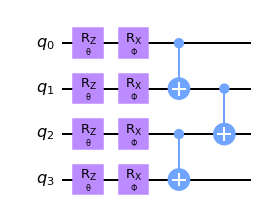

In [27]:
# Circuit D with entanglet states

# We need to define the circuits:
thetaa_param = Parameter('θ')
phii_param = Parameter('Φ')

# Circuite A, with 4 qubits, has no entanglet states
qc_D = QuantumCircuit(4)
qc_D.rz(thetaa_param, 0)
qc_D.rx(phii_param, 0)

qc_D.rz(thetaa_param, 1)
qc_D.rx(phii_param, 1)

qc_D.rz(thetaa_param, 2)
qc_D.rx(phii_param, 2)

qc_D.rz(thetaa_param, 3)
qc_D.rx(phii_param, 3)

qc_D.cx(0, 1)
qc_D.cx(2, 3)
qc_D.cx(1, 2)

qc_D.draw('mpl')

## Parameterized quantum circuts for machine learning

In QML, parameterized quantum circuits tent to be used for two things:

1. To encode data, where the parameters are determined by the data being encoded.
2. As a quantum model, where the parametes are determined by an optimization process.

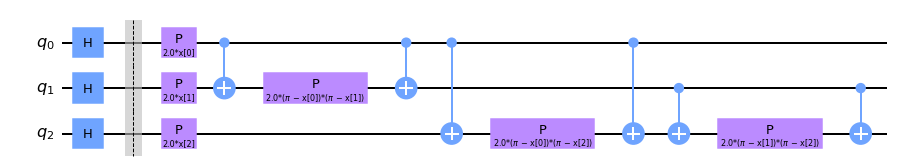

In [31]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw('mpl')

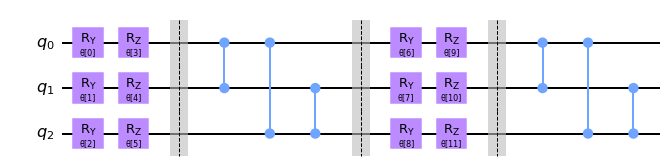

In [30]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry', 'rz'],
                      entanglement_blocks='cz', skip_final_rotation_layer=True,
                      insert_barriers=True)

qc_twolocal.decompose().draw('mpl')

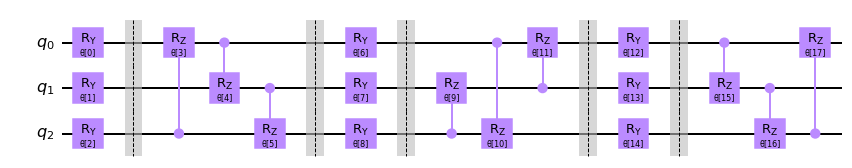

In [32]:
qc_13 = TwoLocal(3, rotation_blocks='ry',
                entanglement_blocks='crz', entanglement='sca',
                reps=3, skip_final_rotation_layer=True,
                insert_barriers=True)

qc_13.decompose().draw('mpl')

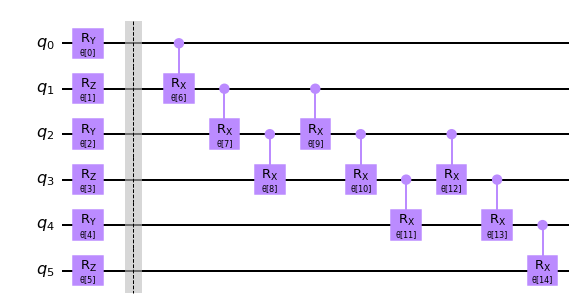

In [33]:
from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                 entanglement_blocks=ent, entanglement='linear',
                 skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw('mpl')